## Gerekli Kütüphaneler

In [65]:
# Gerekli kütüphaneler (eğer yoksa ilk satırı aç)
# !pip install pandas numpy matplotlib seaborn nltk langdetect openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Okuma

In [66]:
# CSV dosyasını oku
df = pd.read_csv("data/raw/patentAI.csv", low_memory=False)

# Boyut ve genel bilgi
print("Veri boyutu:", df.shape)
df.info()


Veri boyutu: (18759, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18759 entries, 0 to 18758
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patent_id            18759 non-null  object 
 1   title                18759 non-null  object 
 2   assignee             18759 non-null  object 
 3   inventor_author      18759 non-null  object 
 4   priority_date        18759 non-null  object 
 5   filing_date          18759 non-null  object 
 6   publication_date     18759 non-null  object 
 7   grant_date           18759 non-null  object 
 8   result_link          18759 non-null  object 
 9   image_link           18759 non-null  object 
 10  language             18759 non-null  object 
 11  technology_category  18759 non-null  object 
 12  publication_year     18759 non-null  float64
 13  filing_year          18759 non-null  float64
dtypes: float64(2), object(12)
memory usage: 2.0+ MB


## Kayıp ve Kopya Değer

In [67]:
# Eksik değer tablosu
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
})
display(missing_table[missing_table["missing_count"] > 0])

# Duplicate kontrolü
dup_count = df.duplicated().sum()
print(f"Duplicate kayıt sayısı: {dup_count}")


,missing_count,missing_pct


Duplicate kayıt sayısı: 0


In [68]:
print("Sütunlar:")
print(list(df.columns))

# Title sütunu varsa örnek
if "title" in df.columns:
    display(df["title"].head(10))
else:
    print("title sütunu yoksa hangi sütun başlıkları içeriyor belirt (ör: 'patent_title' vs.)")


Sütunlar:
['patent_id', 'title', 'assignee', 'inventor_author', 'priority_date', 'filing_date', 'publication_date', 'grant_date', 'result_link', 'image_link', 'language', 'technology_category', 'publication_year', 'filing_year']


0    Touch screen device, method and graphic user i...
1    Data object store and server for a cloud stora...
2                     Intelligent Automated Assistant 
3    Soybean event MON89788 and methods for detecti...
4    System and method for providing network suppor...
5    Processing anomaly data to identify network se...
6                       Personal monitoring apparatus 
7    Unlocking a device by performing gestures on a...
8    Surgical instrument having force feedback capa...
9                                      Display device 
Name: title, dtype: object

In [69]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
})
missing_table[missing_table["missing_count"] > 0]
print(f"Kayıp değer sayısı: {missing}")

Kayıp değer sayısı: patent_id              0
title                  0
assignee               0
inventor_author        0
priority_date          0
filing_date            0
publication_date       0
grant_date             0
result_link            0
image_link             0
language               0
technology_category    0
publication_year       0
filing_year            0
dtype: int64


## Dil Dağılımı

,count,percentage
language,,
english,14083,75.07
unknown,3950,21.06
turkish,726,3.87


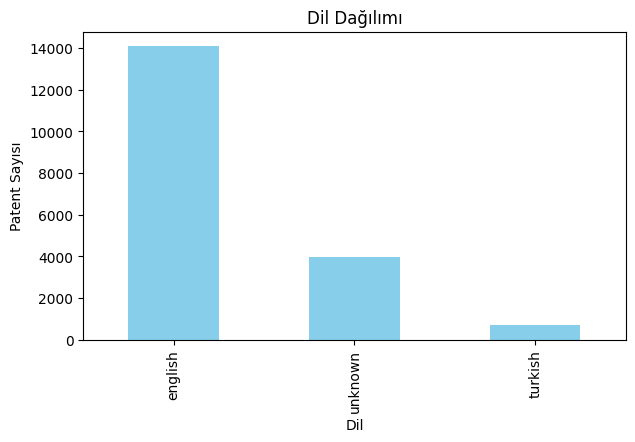

In [70]:
lang_counts = df['language'].value_counts()
lang_pct = (lang_counts / len(df) * 100).round(2)
lang_summary = pd.DataFrame({
    'count': lang_counts,
    'percentage': lang_pct
})
display(lang_summary)

# Görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
lang_counts.plot(kind='bar', color='skyblue')
plt.title('Dil Dağılımı')
plt.xlabel('Dil')
plt.ylabel('Patent Sayısı')
plt.show()


## Yıllara Göre Patent Dağılımı

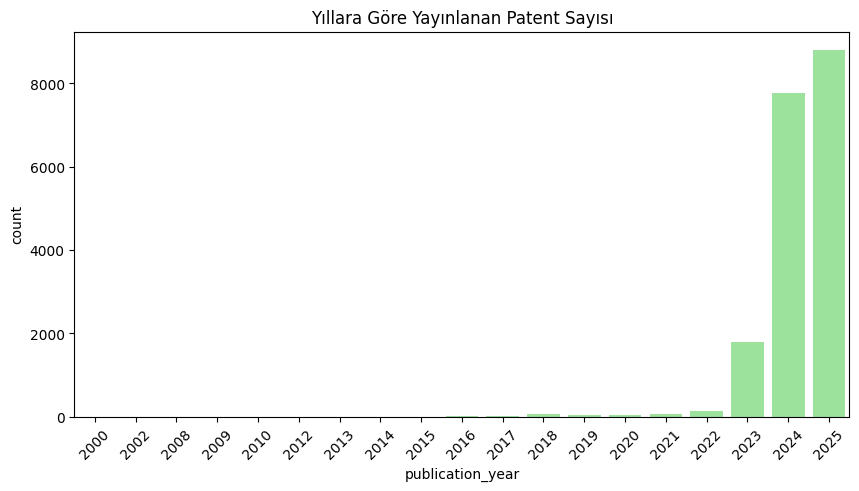

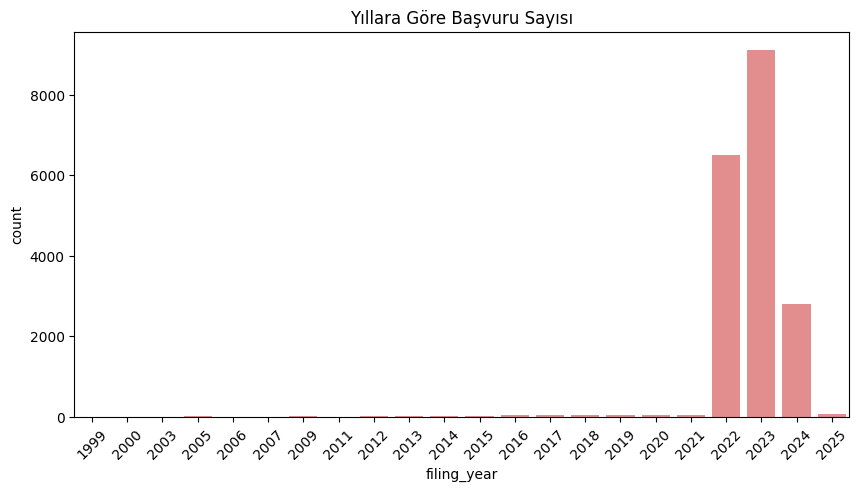

In [71]:
# Yıl sütunlarını integer'a çevir
year_columns = ["publication_year", "filing_year"]

for col in year_columns:
    df[col] = df[col].astype(float).round().astype("Int64")

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='publication_year', color='lightgreen')
plt.title('Yıllara Göre Yayınlanan Patent Sayısı')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='filing_year', color='lightcoral')
plt.title('Yıllara Göre Başvuru Sayısı')
plt.xticks(rotation=45)
plt.show()


## Title Uzunluğu Analizi

Karakter uzunluğu istatistikleri:
count    18759.000000
mean        60.368463
std         30.818546
min          5.000000
25%         39.000000
50%         55.000000
75%         77.000000
max        315.000000
Name: title_length_chars, dtype: float64

Kelime sayısı istatistikleri:
count    18759.000000
mean         7.908097
std          4.275171
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         45.000000
Name: title_length_words, dtype: float64


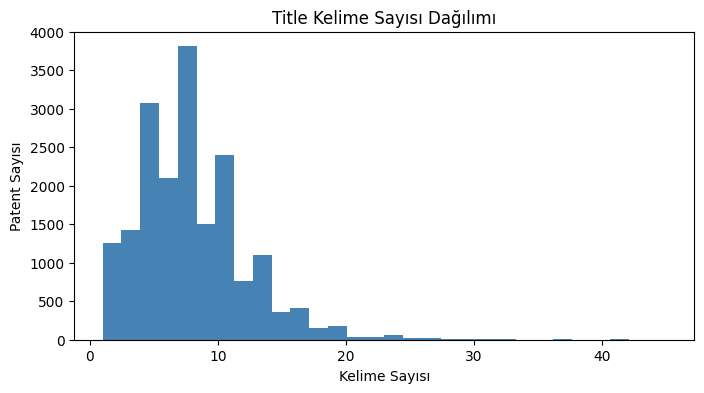

In [72]:
# Title uzunlukları
df['title_length_chars'] = df['title'].str.len()
df['title_length_words'] = df['title'].str.split().apply(len)

print("Karakter uzunluğu istatistikleri:")
print(df['title_length_chars'].describe())
print("\nKelime sayısı istatistikleri:")
print(df['title_length_words'].describe())

# Görsel olarak dağılım
plt.figure(figsize=(8,4))
plt.hist(df['title_length_words'], bins=30, color='steelblue')
plt.title('Title Kelime Sayısı Dağılımı')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Patent Sayısı')
plt.show()


## En Çok Patenti Olan Assignee (Şirket) ve Inventor (Birey)

En çok patenti olan ilk 10 Assignee:


assignee
Apple Inc.                                   447
株式会社半導体エネルギー研究所                              340
Google Llc                                   257
Samsung Electronics Co., Ltd.                252
Intel Corporation                            173
Cilag Gmbh International                     163
Interdigital Patent Holdings, Inc.           156
Samsung Display Co., Ltd.                    137
Align Technology, Inc.                       126
Semiconductor Energy Laboratory Co., Ltd.    117
Name: count, dtype: int64


En çok patenti olan ilk 10 Inventor:


inventor_author
径太 石塚                          31
義宏 胡本, 哲 川島                    30
舜平 山崎                          23
Esmael Hejazi Dinan            20
肇 木村                           16
Yilmaz İrem                    13
昇平 北田                          12
スティーヴン ライト，クレイグ, サヴァナ，ステファヌ    12
Hsin-Hsuan Huang               11
Roger P. Jackson               11
Name: count, dtype: int64

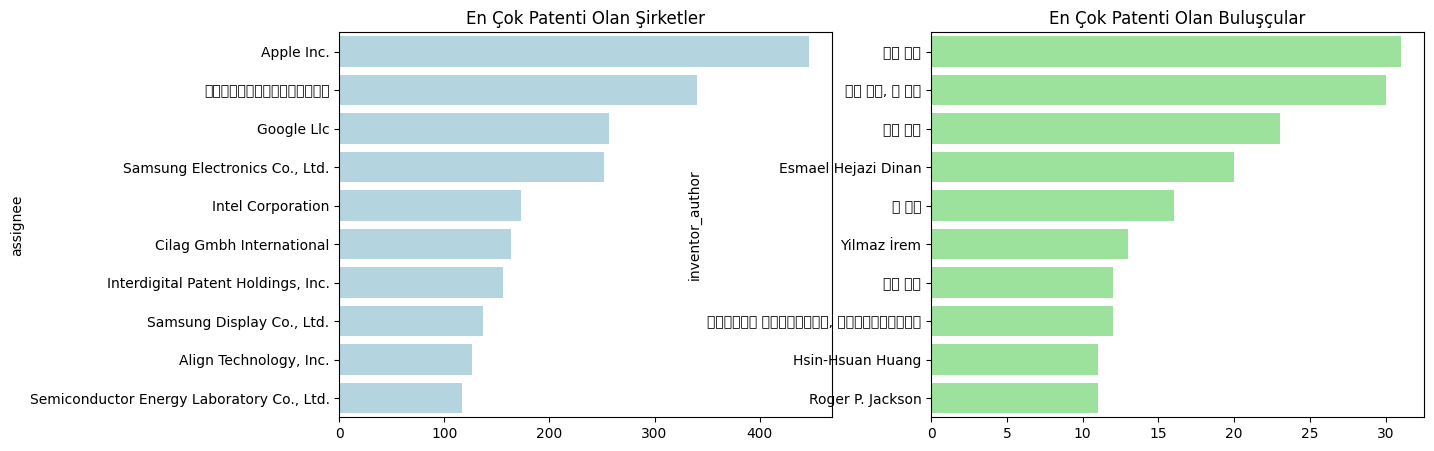

In [73]:
top_assignee = df['assignee'].value_counts().head(10)
top_inventor = df['inventor_author'].value_counts().head(10)

print("En çok patenti olan ilk 10 Assignee:")
display(top_assignee)

print("\nEn çok patenti olan ilk 10 Inventor:")
display(top_inventor)

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x=top_assignee.values, y=top_assignee.index, ax=axes[0], color='lightblue')
axes[0].set_title("En Çok Patenti Olan Şirketler")
sns.barplot(x=top_inventor.values, y=top_inventor.index, ax=axes[1], color='lightgreen')
axes[1].set_title("En Çok Patenti Olan Buluşçular")
plt.show()


## Teknoloji Kategorisine Göre Dağılım

,count,percentage
technology_category,,
other,9976,53.18
hardware,3491,18.61
software,2454,13.08
automotive,699,3.73
telecom,639,3.41
energy,507,2.70
ai_ml,353,1.88
cloud,299,1.59
biotech,201,1.07


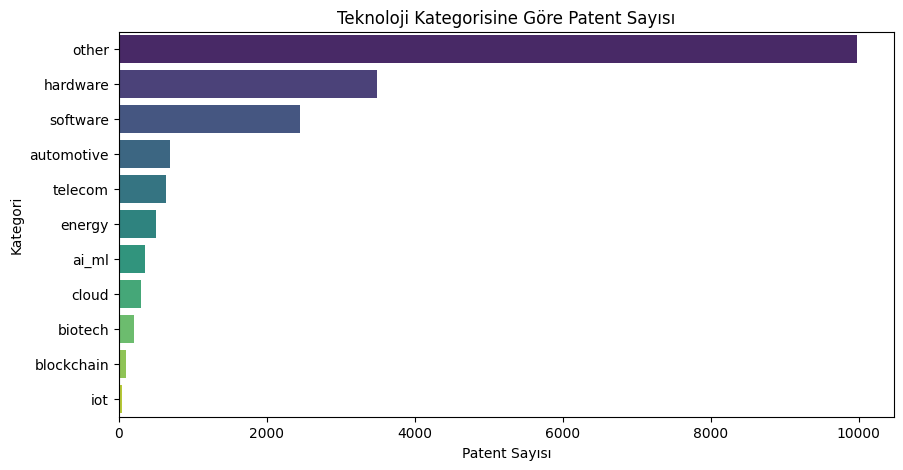

In [74]:
# Kategori dağılımı
tech_counts = df['technology_category'].value_counts()
tech_pct = (tech_counts / len(df) * 100).round(2)
tech_summary = pd.DataFrame({
    'count': tech_counts,
    'percentage': tech_pct
})
display(tech_summary)

# Görselleştirme
plt.figure(figsize=(10,5))
sns.barplot(x=tech_counts.values, y=tech_counts.index, palette="viridis")
plt.title("Teknoloji Kategorisine Göre Patent Sayısı")
plt.xlabel("Patent Sayısı")
plt.ylabel("Kategori")
plt.show()


## En Sık Geçen Kelimeler (Title Analizi)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\27ome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,count
0,method,3680
1,system,3345
2,methods,3047
3,device,3001
4,systems,2110
5,apparatus,1590
6,using,1057
7,display,962
8,devices,959
9,based,886


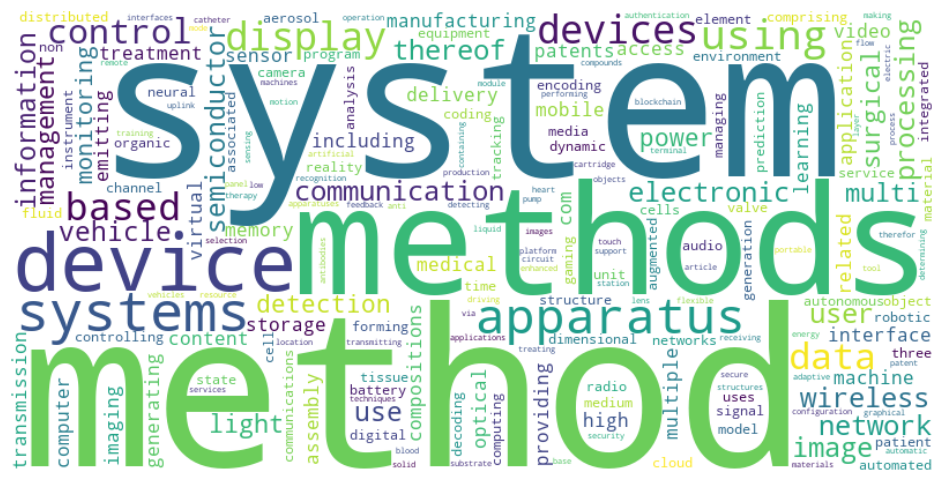

In [75]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# İngilizce stopwords
stop_words = set(stopwords.words('english'))

# Title’ları temizle ve tokenize et
all_words = []
for title in df['title']:
    if isinstance(title, str):
        # Noktalama ve sayı temizle
        words = re.findall(r'\b[a-zA-Z]{2,}\b', title.lower())
        words = [w for w in words if w not in stop_words]
        all_words.extend(words)

# Kelime frekansı
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

# Tablo
import pandas as pd
common_words_df = pd.DataFrame(most_common_words, columns=['word','count'])
display(common_words_df)

# Wordcloud görselleştirme (opsiyonel)
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 5 En Aktif Şirketin Kategori Dağılımı

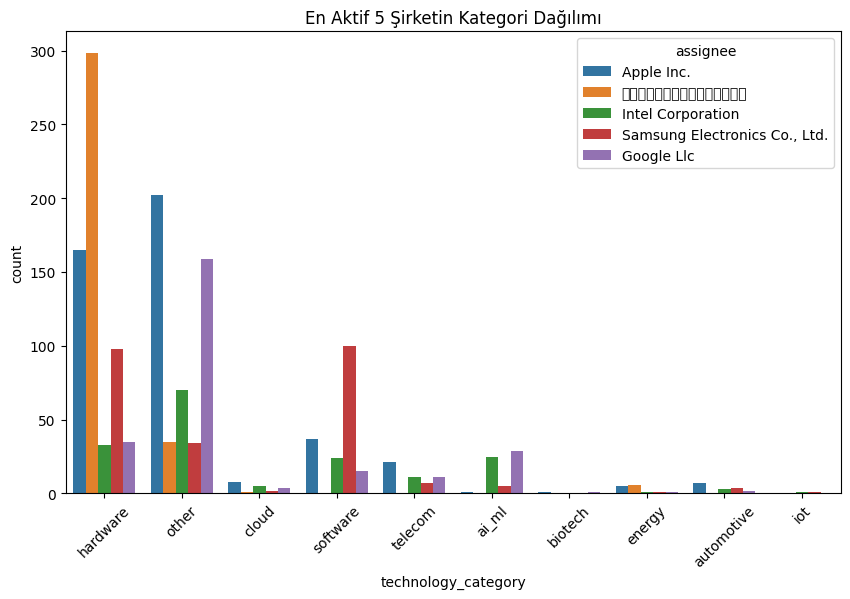

In [76]:
top_assignees = df['assignee'].value_counts().head(5).index
df_top_assignees = df[df['assignee'].isin(top_assignees)]
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_assignees, x='technology_category', hue='assignee')
plt.title("En Aktif 5 Şirketin Kategori Dağılımı")
plt.xticks(rotation=45)
plt.show()


## Yıllara Göre Kategori Trend Grafiği

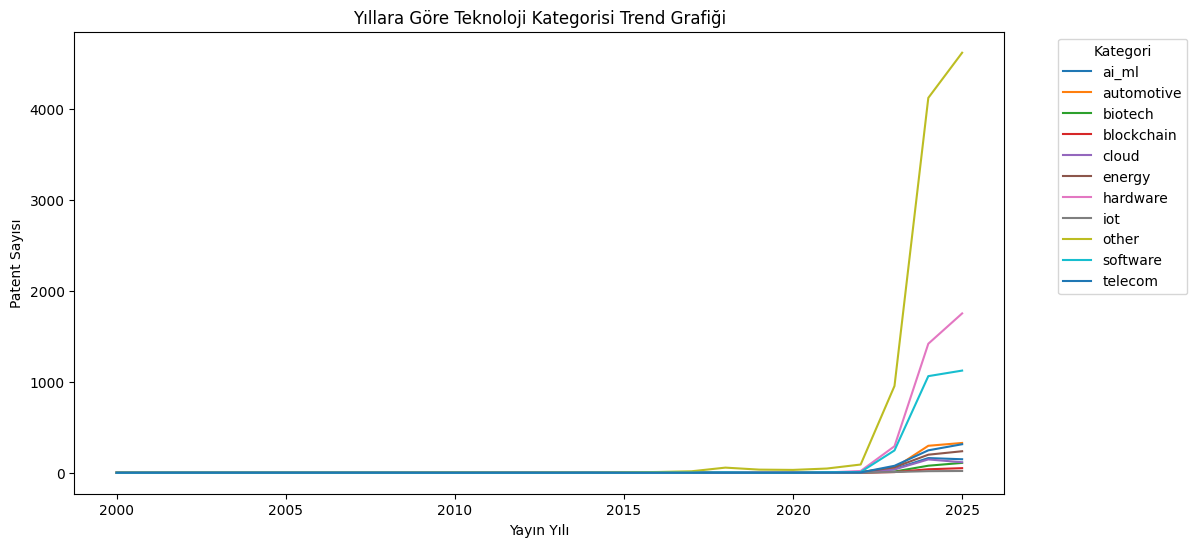

In [77]:
pivot = df.pivot_table(index='publication_year', columns='technology_category', aggfunc='size', fill_value=0)
pivot.plot(figsize=(12,6))
plt.title("Yıllara Göre Teknoloji Kategorisi Trend Grafiği")
plt.xlabel("Yayın Yılı")
plt.ylabel("Patent Sayısı")
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1))
plt.show()
